# Clustering con K-means

[Curso de Clustering con Python y scikit-learn](https://platzi.com/cursos/clustering)

## Importar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score # indice de silueta
from yellowbrick.cluster import SilhouetteVisualizer # visualizar los indices

## Preparando datos de prueba

In [2]:
X,y,c = make_blobs(500, cluster_std=0.8, centers=4, n_features=2, return_centers=True)

In [3]:
# Datos graficados en 2D
X

array([[ 5.01796542,  2.8379861 ],
       [ 5.01295915,  3.74132493],
       [ 1.81159715, -2.59127774],
       [-4.94403905, -4.92123199],
       [ 1.4969279 , -1.72827807],
       [-2.05131883,  2.2353805 ],
       [ 2.03686662, -3.09345038],
       [ 6.27048593,  3.26658075],
       [-1.72172412,  1.20092516],
       [-2.16424881,  1.1733024 ],
       [-4.04438597, -5.88990184],
       [-5.02438177, -4.41949481],
       [ 1.32059136, -1.88018203],
       [-4.14141642,  2.06479116],
       [-0.68716124,  1.45294494],
       [ 6.16494616,  2.37007502],
       [-1.36620545,  1.83254573],
       [-4.58908133, -4.38641383],
       [ 2.3079614 , -4.06172977],
       [-3.77192464, -2.25099045],
       [ 5.50922832,  0.94332695],
       [-1.33210159,  1.36053796],
       [-0.8757629 ,  3.15593312],
       [ 0.12485111, -3.14795077],
       [-4.83066771, -6.40197034],
       [-1.17321128,  0.72458583],
       [-3.19338553,  0.38021866],
       [ 6.04724398,  5.12334421],
       [-4.57823619,

In [4]:
# clusters al que pertenecen los datos X
y

array([0, 0, 2, 3, 2, 1, 2, 0, 1, 1, 3, 3, 2, 1, 1, 0, 1, 3, 2, 3, 0, 1,
       1, 2, 3, 1, 1, 0, 3, 3, 2, 1, 3, 0, 1, 3, 1, 0, 1, 2, 3, 2, 2, 2,
       0, 3, 2, 0, 3, 3, 3, 1, 1, 0, 0, 0, 3, 0, 3, 2, 2, 1, 1, 2, 3, 1,
       2, 0, 2, 1, 0, 0, 1, 0, 0, 3, 2, 1, 3, 0, 1, 1, 1, 1, 0, 3, 3, 2,
       0, 0, 2, 2, 2, 1, 3, 0, 2, 3, 0, 2, 2, 1, 2, 2, 1, 0, 2, 1, 2, 1,
       1, 3, 0, 2, 3, 1, 3, 3, 3, 0, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2,
       1, 2, 0, 0, 1, 2, 3, 0, 3, 2, 0, 3, 2, 3, 0, 0, 1, 3, 3, 2, 2, 3,
       2, 1, 1, 0, 3, 0, 1, 1, 2, 0, 0, 3, 2, 3, 1, 0, 1, 0, 1, 3, 2, 0,
       3, 0, 3, 2, 2, 3, 0, 1, 3, 0, 2, 0, 1, 2, 1, 2, 3, 0, 2, 3, 0, 0,
       3, 2, 3, 2, 3, 2, 3, 3, 2, 0, 1, 2, 0, 0, 3, 1, 0, 0, 0, 0, 0, 3,
       1, 1, 3, 1, 2, 3, 2, 3, 0, 0, 3, 2, 2, 1, 3, 2, 0, 0, 1, 3, 3, 2,
       0, 3, 1, 3, 1, 2, 3, 3, 0, 0, 3, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 2,
       0, 1, 1, 3, 1, 3, 2, 2, 2, 3, 2, 1, 2, 2, 3, 1, 0, 0, 2, 3, 3, 0,
       1, 1, 1, 1, 2, 1, 3, 3, 2, 2, 0, 0, 3, 3, 2,

In [5]:
# Ubicacion de los 4 centroides
c

array([[ 5.0035145 ,  2.70987635],
       [-2.03037516,  1.57606012],
       [ 1.34898717, -2.85724981],
       [-4.45572657, -4.60498894]])

In [6]:
# formato de dataframe a los datos 
df_blobs = pd.DataFrame(
    {
        'x1': X[:,0],
        'x2': X[:,1],
        'y': y
    }
)

df_blobs


,x1,x2,y
0,5.017965,2.837986,0
1,5.012959,3.741325,0
2,1.811597,-2.591278,2
3,-4.944039,-4.921232,3
4,1.496928,-1.728278,2
...,...,...,...
495,4.751485,2.601188,0
496,-0.359037,1.963234,1
497,-1.141333,2.499107,1
498,1.000551,-2.602207,2


In [7]:
# formato de dataframe de los centroides
df_centers = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2' :c[:,1]
    }
)

df_centers

,x1,x2
0,5.003514,2.709876
1,-2.030375,1.576060
2,1.348987,-2.857250
3,-4.455727,-4.604989


## Visualización de datos

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


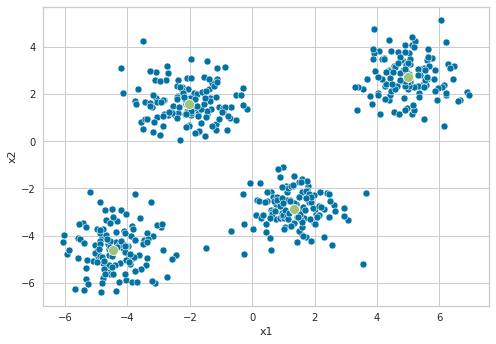

In [8]:
sns.scatterplot(data=df_blobs, x='x1', y='x2')
sns.scatterplot(data=df_centers, x='x1', y='x2', markers='x', s=100)
plt.show()

## Aplicando K-means

Vamos a aplicar el modelo k-means probando incialmente con 3 clusteres

In [9]:
# definimos el modelo ML
kmeans = KMeans(n_clusters=3)

# entrenamos el modelo con X y asignamos una etiqueta de cluster a cada X
df_cluster = kmeans.fit_predict(X)

# agregar las etiquetas de cluster al df original
df_blobs['cluster'] = df_cluster

# obtener las coordenadas de los centroides
k_means_centers = kmeans.cluster_centers_

# crear un df con las coordenadas de los centroides
df_k_means_center = pd.DataFrame(
    {
        'x1':k_means_centers[:,0],
        'x2':k_means_centers[:,1]
    }
)

/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


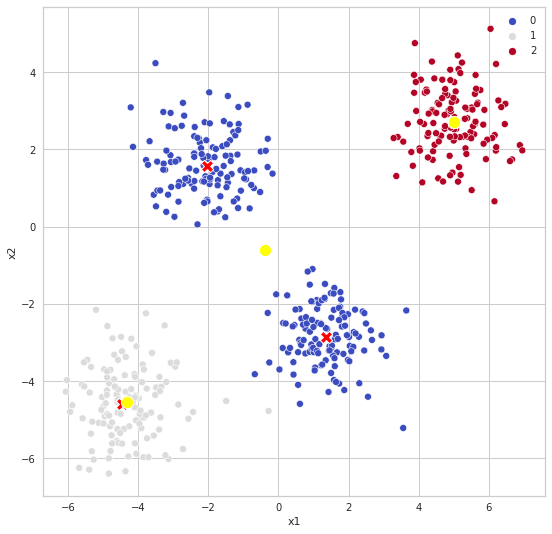

In [10]:
# graicamos los clusteres
fig = plt.figure(figsize=(9,9))
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster', palette='coolwarm')
sns.scatterplot(data=df_centers, x='x1', y='x2', marker='X', s=150, color='red')
sns.scatterplot(data=df_k_means_center, x='x1', y='x2', marker='o', s=150, color='yellow')
plt.show()


> Los centroides amarillos son los predichos por el modelo que al elegir 3, nos muestra los tres centroides.

> Los centroides rojos, son los dados en los datos y estan ubicados en cada cluster.

In [11]:
# Funcion que grafica los clusteres para dierentes K
def vis_cluster(k):
    kmeans = KMeans(n_clusters=k)
    df_cluster = kmeans.fit_predict(X)
    df_blobs['cluster'] = df_cluster
    k_means_centers = kmeans.cluster_centers_
    df_k_means_center = pd.DataFrame(
        {
            'x1':k_means_centers[:,0],
            'x2':k_means_centers[:,1]

        }
    )    
    fig = plt.figure(figsize=(9,9))
    sns.scatterplot(data=df_blobs,  x='x1', y='x2', hue= 'cluster', palette='coolwarm')
    sns.scatterplot(data=df_centers,  x='x1', y='x2', marker='X', s=150 , color='red')
    sns.scatterplot(data=df_k_means_center,  x='x1', y='x2', marker='o', s=150 , color='yellow')
    plt.show()

3


/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


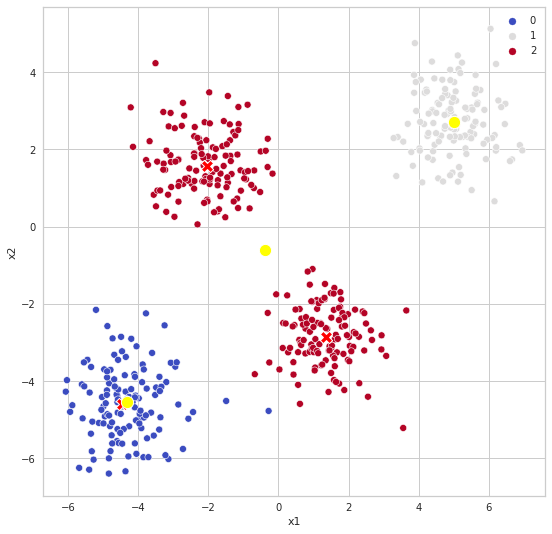

4


/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


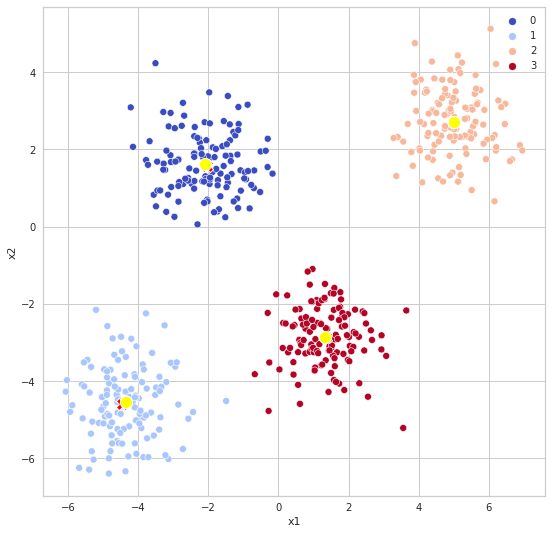

5


/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


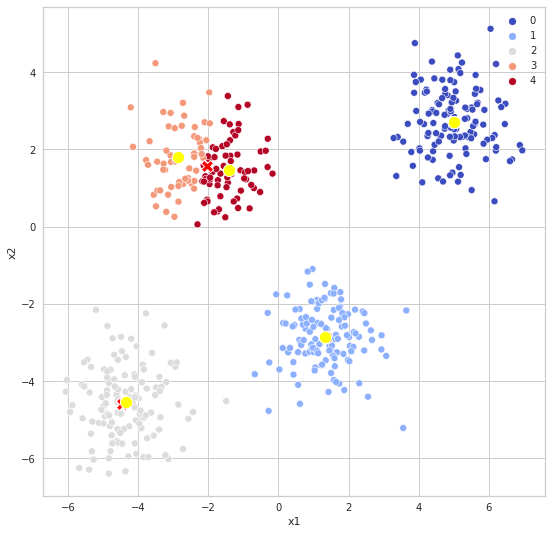

6


/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


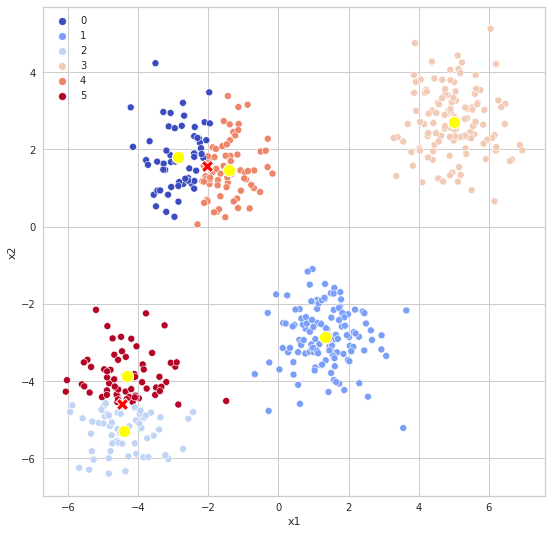

In [12]:
# visualizamos los clusters con 3 hasta 6 K
for _ in range(3,7):
    print(_)
    vis_cluster(_)

> En cada caso podemos ver como el modelo se ajusta a la cantidad de cluster a predecir llegando a dividir los cluster erroneamente si se le pide un K demasiado alto.

> Para conjuntos de datos pequenos y de baja dimensionalidad este enfoque es efectivo. Sin embargo, en otros casos resulta complicado. En tales casos se utiliza el metodo del codo. 

## Encontrando el valor de K

Vamos a utilizar el metodo del codo para encontrar el K optimo. Es util para conjuntos de datos grandes y con alta dimensionalidad.  

/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

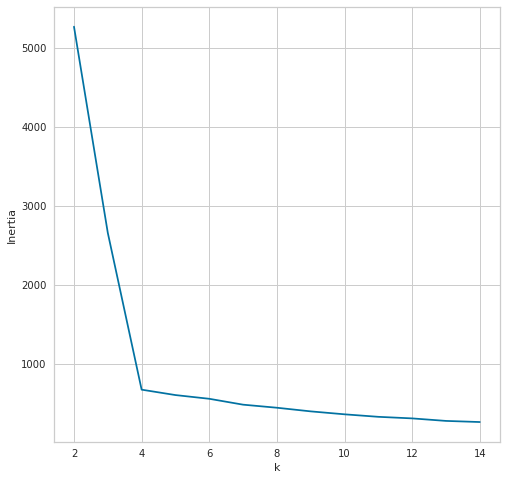

In [13]:
# lista que alamacena las distancias WCSS
sum_of_squared_distances = []

# definimos el rango de valores de K
K = range(2,15)

# entrenamos el modelo para los distintos K
for k in K: 
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

# Creamos la grafica del codo
plt.figure(figsize=(8,8))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()


> el grafico nos muestra que el K optimo es 4.

## Encontrando el K con el coeficiente de silueta

/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

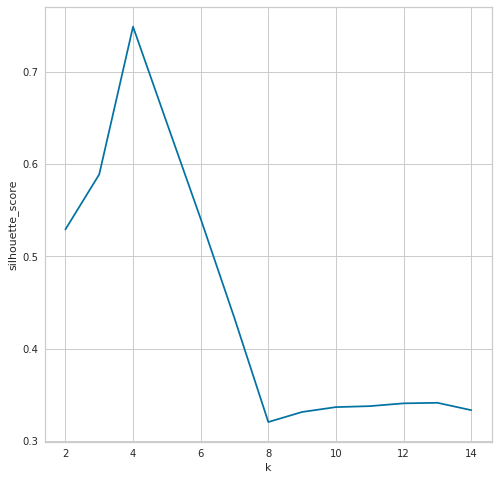

In [14]:
# lista para guardar los coeficientes
silhouette_scores = []

# definimos el rango de K
K = range(2,15)

# entrenamos el modelo con diferentes K
for k in K: 
    # creamos el modelo con k clusteres
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    # prediccion del cluster al que pertenece cada punto
    y = km.predict(X)
    # guardar el indice de silueta
    silhouette_scores.append(silhouette_score(X,y))

# crear el grafico de silueta
plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.show()

## Evaluando clusters con K-means

/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


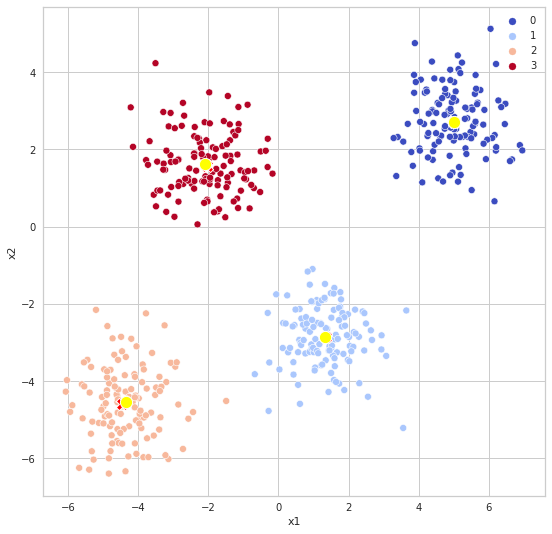

In [15]:
vis_cluster(4)

> Graficamente vemos que los centroides obtenidos con k-means se ajustan muy bien a cada grupo de dato.

Vamos a visualizar la calidad de los cluster usando el coeficiente de silueta

/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(n_clusters=4))

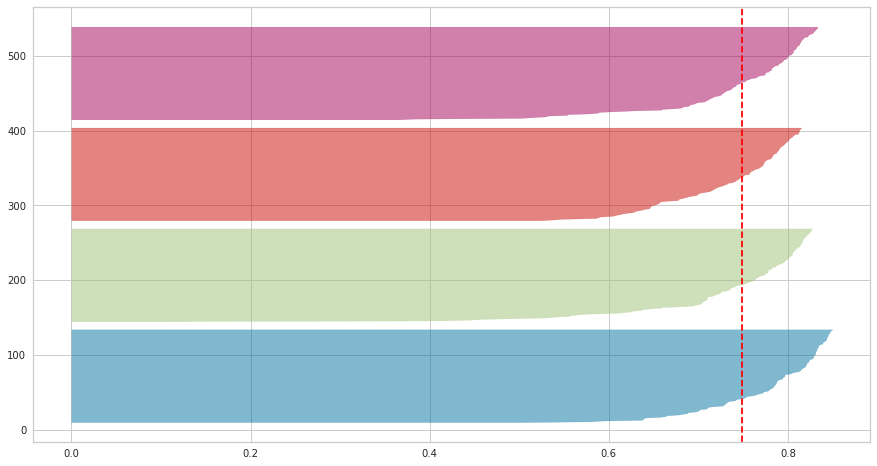

In [ ]:
# Configuramos la grafica de la viuaizacion
plt.figure(figsize=(15,8))
# creamos un moddelo con 4 clustere 
km = KMeans(n_clusters=4) 
# creamos un viuaizador de silueta
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
# ajustamos el modelo a los datos y generamos la visualizacion
visualizer.fit(X)

> El coeficiente de silueta general es de aproximadamente 0.75, el cual es un resultado bastante bueno 

> Se muestra que tenemo un cluster bastante separado del resto.